In [1]:
import os
import json
import h5py
import numpy as np

import robomimic
import robomimic.utils.file_utils as FileUtils
import robomimic.utils.env_utils as EnvUtils
import robomimic.utils.obs_utils as ObsUtils
import imageio
import tqdm
from robomimic.utils.file_utils import create_hdf5_filter_key
import shutil

import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)

In [2]:
dataset_path = "/home/ns1254/data_robomimic/lift_image_real_robomimic.hdf5"

# dataset_path = "/home/ns1254/data_robomimic/lift/mh/image.hdf5" #Note: sim

In [3]:
f = h5py.File(dataset_path, "r")
demos = list(f["data"].keys())

In [4]:
lengths=[]
for demo_name in demos:
    demo=f['data'][demo_name]
    num_samples=demo.attrs['num_samples']
    lengths.append(num_samples)

lengths=np.array(lengths)

print('Number of demos: ', len(demos))
print('Max length: ', np.max(lengths))
print('Min length: ', np.min(lengths))
print('Mean length: ', np.mean(lengths))

Number of demos:  200
Max length:  75
Min length:  45
Mean length:  57.62


In [5]:
for key in f['mask'].keys():
    print(key, f['mask'][key])

train <HDF5 dataset "train": shape (180,), type "|S8">
valid <HDF5 dataset "valid": shape (20,), type "|S8">


In [6]:
demo=f['data'][demos[0]]
actions=demo['actions']
actions.shape

(66, 7)

In [7]:
demo.keys()

<KeysViewHDF5 ['actions', 'dones', 'interventions', 'next_obs', 'obs', 'policy_acting', 'rewards', 'states', 'user_acting']>

In [8]:
demo['obs'].keys()

<KeysViewHDF5 ['dq', 'ee_pose', 'ee_vel', 'gripper_position', 'image', 'image_wrist', 'q']>

In [ ]:
actions[:,6]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1.])

In [14]:
actions[:20,:3]

array([[ 0.0064, -0.008 , -0.0088],
       [ 0.0524, -0.0532, -0.0789],
       [ 0.1117, -0.0911, -0.1353],
       [ 0.1802, -0.109 , -0.1441],
       [ 0.2514, -0.1327, -0.1955],
       [ 0.3025, -0.1379, -0.231 ],
       [ 0.2899, -0.1149, -0.2079],
       [ 0.3067, -0.1119, -0.2267],
       [ 0.3   , -0.0955, -0.2285],
       [ 0.3159, -0.0867, -0.2593],
       [ 0.3168, -0.0667, -0.2893],
       [ 0.2731, -0.0292, -0.2417],
       [ 0.2743, -0.0016, -0.2644],
       [ 0.2917,  0.021 , -0.2878],
       [ 0.2774,  0.0445, -0.2835],
       [ 0.2823,  0.0666, -0.2947],
       [ 0.258 ,  0.092 , -0.2902],
       [ 0.2467,  0.1203, -0.3117],
       [ 0.2142,  0.1457, -0.3096],
       [ 0.1906,  0.169 , -0.3135]])

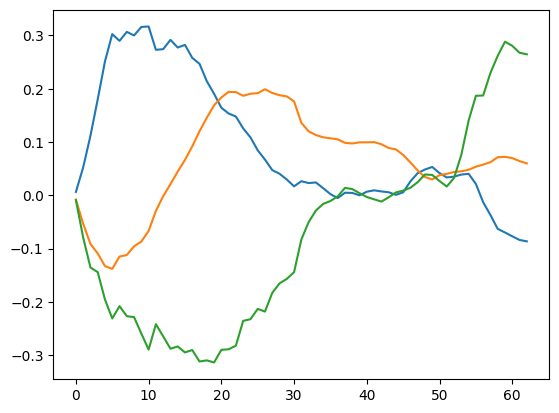

In [15]:
xyz=actions[:,:3]
# print(demo_name, xyz.shape)

plt.plot(xyz[:,0], label='x')
plt.plot(xyz[:,1], label='y')
plt.plot(xyz[:,2], label='z')

In [11]:
savepath=dataset_path.replace('.hdf5', '/action_imgs/')
print(savepath)
if not os.path.exists(savepath):
    os.makedirs(savepath)

/home/ns1254/data_robomimic/lift_image_real_robomimic/action_imgs/


In [12]:
for demo_name in demos:
    demo=f['data'][demo_name]
    actions=demo['actions']
    xyz=actions[:,:3]
    # print(demo_name, xyz.shape)
    
    plt.plot(xyz[:,0], label='x')
    plt.plot(xyz[:,1], label='y')
    plt.plot(xyz[:,2], label='z')
    plt.legend()
    plt.savefig(savepath+'/'+demo_name+'.png')
    plt.close()

In [35]:
# dataset_path = "/home/ns1254/data_franka/lift_blue30.hdf5"
dataset_path = "/home/ns1254/data_franka/lift_blue_imgs30.hdf5"

f = h5py.File(dataset_path, "r")
demos = list(f["data"].keys())

lengths=[]
for demo_name in demos:
    demo=f['data'][demo_name]
    num_samples=demo.attrs['num_samples']
    lengths.append(num_samples)

lengths=np.array(lengths)

print('Number of demos: ', len(demos))
print('Max length: ', np.max(lengths))
print('Min length: ', np.min(lengths))
print('Mean length: ', np.mean(lengths))

Number of demos:  30
Max length:  175
Min length:  98
Mean length:  125.56666666666666


In [36]:
demo=f['data'][demos[3]]
actions=demo['actions']
actions.shape

(121, 7)

In [37]:
actions[:,6]

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.])

In [38]:
actions[:10,:]

array([[ 0.0571, -0.0114, -0.5657,  0.0246,  0.    , -0.    , -1.    ],
       [ 0.02  ,  0.    , -0.7486,  0.0364,  0.    , -0.    , -1.    ],
       [ 0.0171,  0.    , -0.7514,  0.0364,  0.    , -0.    , -1.    ],
       [ 0.02  ,  0.    , -0.7629,  0.0375,  0.    , -0.    , -1.    ],
       [ 0.0229,  0.    , -0.7857,  0.0375,  0.    , -0.    , -1.    ],
       [ 0.0171,  0.    , -0.7914,  0.0386,  0.    , -0.    , -1.    ],
       [ 0.0171,  0.    , -0.8   ,  0.0375,  0.    , -0.    , -1.    ],
       [ 0.0257,  0.    , -0.8171,  0.0396,  0.    , -0.    , -1.    ],
       [ 0.0257,  0.    , -0.8457,  0.0418,  0.    , -0.    , -1.    ],
       [ 0.0286,  0.    , -0.8743,  0.0439,  0.    , -0.    , -1.    ]])

In [39]:
# actions[-40:,:]

In [40]:
savepath=dataset_path.replace('.hdf5', '/action_imgs/')
print(savepath)
if not os.path.exists(savepath):
    os.makedirs(savepath)

/home/ns1254/data_franka/lift_blue_imgs30/action_imgs/


In [41]:
for demo_name in demos:
    demo=f['data'][demo_name]
    actions=demo['actions']
    xyz=actions[:,:3]
    # print(demo_name, xyz.shape)
    
    plt.plot(xyz[:,0], label='x')
    plt.plot(xyz[:,1], label='y')
    plt.plot(xyz[:,2], label='z')
    plt.legend()
    plt.savefig(savepath+'/'+demo_name+'.png')
    plt.close()

In [43]:
demo.keys()

<KeysViewHDF5 ['actions', 'obs']>

In [44]:
demo['obs'].keys()

<KeysViewHDF5 ['agentview_rgb', 'ee_states', 'eye_in_hand_rgb', 'gripper_states', 'joint_states']>

In [45]:
demo['obs']['agentview_rgb'].shape

(140, 120, 120, 3)